In [39]:
# load modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline
sns.set()

In [2]:
pokemon = pd.read_csv('datasets/pokemon.csv')
pokemon.describe(exclude='number')

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Trevenant,Water,Flying,False
freq,1,112,97,735


In [3]:
pokemon.describe()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
from sklearn.linear_model import Lasso
pokemon.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
pokemon.drop(['Type 2', 'Name'], axis=1, inplace=True)

In [7]:
pokemon['Legendary'] = pokemon['Legendary'].astype(int)

In [8]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Type 1      800 non-null    object
 2   Total       800 non-null    int64 
 3   HP          800 non-null    int64 
 4   Attack      800 non-null    int64 
 5   Defense     800 non-null    int64 
 6   Sp. Atk     800 non-null    int64 
 7   Sp. Def     800 non-null    int64 
 8   Speed       800 non-null    int64 
 9   Generation  800 non-null    int64 
 10  Legendary   800 non-null    int32 
dtypes: int32(1), int64(9), object(1)
memory usage: 65.8+ KB


In [9]:
pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Dragon       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [10]:
le = LabelEncoder()

pokemon.iloc[:, 0] = le.fit_transform(pokemon.iloc[:, 0])

In [11]:
pokemon.iloc[:, 1] = le.fit_transform(pokemon.iloc[:, 1])

In [12]:
pokemon

,#,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0,9,318,45,49,49,65,65,45,1,0
1,1,9,405,60,62,63,80,80,60,1,0
2,2,9,525,80,82,83,100,100,80,1,0
3,2,9,625,80,100,123,122,120,80,1,0
4,3,6,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,718,15,600,50,100,150,100,150,50,6,1
796,718,15,700,50,160,110,160,110,110,6,1
797,719,14,600,80,110,60,150,130,70,6,1
798,719,14,680,80,160,60,170,130,80,6,1


In [13]:
X, y = pokemon.drop('Speed', axis=1), pokemon['Speed']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=.3)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

lasso = Lasso().fit(X_train_st, y_train)
# Calculate the coefficient of determination (R squared) on X_test_std
r_squared = lasso.score(X_test_st, y_test)
print("The model can predict {0:.1%} of the variance in the test set.".format(r_squared))

# Create a list that has True values when coefficients equal 0
zero_coef = lasso.coef_ == 0

# Calculate how many features have a zero coefficient
n_ignored = sum(zero_coef)
print("The model has ignored {} out of {} features.".format(n_ignored, len(lasso.coef_)))

zero_coef

The model can predict 78.7% of the variance in the test set.
The model has ignored 3 out of 10 features.


array([ True,  True, False, False, False, False, False, False,  True,
       False])

In [29]:
from sklearn.linear_model import LassoCV

lcv = LassoCV().fit(X_train_st, y_train)
print(lcv.alpha_)
mask = lcv.coef_ != 0
print(mask)
print(sum(mask))
X_train.iloc[:, mask]

0.01618277345597809
[False False  True  True  True  True  True  True False  True]
7


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Legendary
244,465,65,40,70,80,140,0
412,600,80,135,130,95,90,0
630,474,80,95,82,60,82,0
549,600,70,90,90,135,90,1
614,315,70,90,45,15,45,0
...,...,...,...,...,...,...,...
544,680,150,100,120,100,120,1
730,382,62,73,55,56,52,0
253,465,73,95,62,85,65,0
568,281,41,50,37,50,37,0


In [30]:
lcv.score(X_test_st, y_test)


0.8757594518869205

In [31]:
lcv = LassoCV().fit(X_train_st[:, mask], y_train)
print(lcv.score(X_test_st[:, mask], y_test))
print(lcv.score(X_train_st[:, mask], y_train))

0.8757595461729792
0.9999519840532702


In [36]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
# several models & voting

lasso = LassoCV().fit(X_train_st, y_train)
print(f'LassoCV test results: {lasso.score(X_test_st, y_test)}')
lcv_mask = lasso.coef_ != 0
print('{} features out of {} selected'.format(sum(lcv_mask), len(lcv_mask)))
print(sum(lcv_mask))

# randomforest & rfe
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=7, verbose=1).fit(X_train_st, y_train)
rfe_mask = rfe.support_
print('{} features out of {} selected'.format(sum(rfe_mask), len(rfe_mask)))

# gradientboosting
gr_boost = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=7, verbose=1).fit(X_train_st, y_train)
gr_boost_mask = gr_boost.support_
print('{} features out of {} selected'.format(sum(gr_boost_mask), len(gr_boost_mask)))

votes = np.sum([lcv_mask, rfe_mask, gr_boost_mask], axis=0)
print(votes)

top_votes = votes > 1
X.iloc[:, top_votes]




LassoCV test results: 0.8757594518869205
7 features out of 10 selected
7
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
7 features out of 10 selected
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
7 features out of 10 selected
[2 0 3 3 3 3 3 3 0 1]


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def
0,0,318,45,49,49,65,65
1,1,405,60,62,63,80,80
2,2,525,80,82,83,100,100
3,2,625,80,100,123,122,120
4,3,309,39,52,43,60,50
...,...,...,...,...,...,...,...
795,718,600,50,100,150,100,150
796,718,700,50,160,110,160,110
797,719,600,80,110,60,150,130
798,719,680,80,160,60,170,130


In [38]:
# Apply the dimensionality reduction on X
X_reduced = X.iloc[:, top_votes]

# Plug the reduced dataset into a linear regression pipeline
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)
gr_boost = RFE(estimator=GradientBoostingClassifier()).fit(scaler.fit_transform(X_train), y_train)
r_squared = gr_boost.score(scaler.transform(X_test), y_test)
print('The model can explain {0:.1%} of the variance in the test set using {1:} features.'.format(r_squared, len(gr_boost.support_)))

The model can explain 7.9% of the variance in the test set using 7 features.


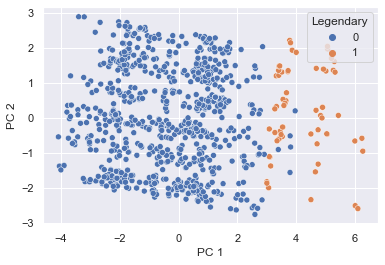

In [40]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(pokemon)

# Add the 2 components to poke_cat_df
pokemon['PC 1'] = pc[:, 0]
pokemon['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=pokemon,
                x='PC 1', y='PC 2', hue='Legendary')
plt.show()


In [41]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.50099586 0.14121997 0.11554577]
8.8% test set accuracy
